In [1]:
import cv2
import matplotlib.pyplot as plt

from utils import *
from darknet import Darknet

In [2]:
cfg_file = './model/yolov3-obj.cfg'

weight_file = './model/yolov3-obj_2400.weights'

namesfile = './model/obj.names'


m = Darknet(cfg_file)
m.load_weights(weight_file)
class_names = load_class_names(namesfile)

In [3]:
m.print_network()

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64
    4 shortcut 1
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
    8 shortcut 5
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
   11 shortcut 8
   12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256
   13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128
   14 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256
   15 shortcut 12
   16 conv    128  1 x 1



It took 0.891 seconds to detect the objects in the image.

Number of Objects Detected: 1 

Objects Found and Confidence Level:

1. Helmet: 1.000000


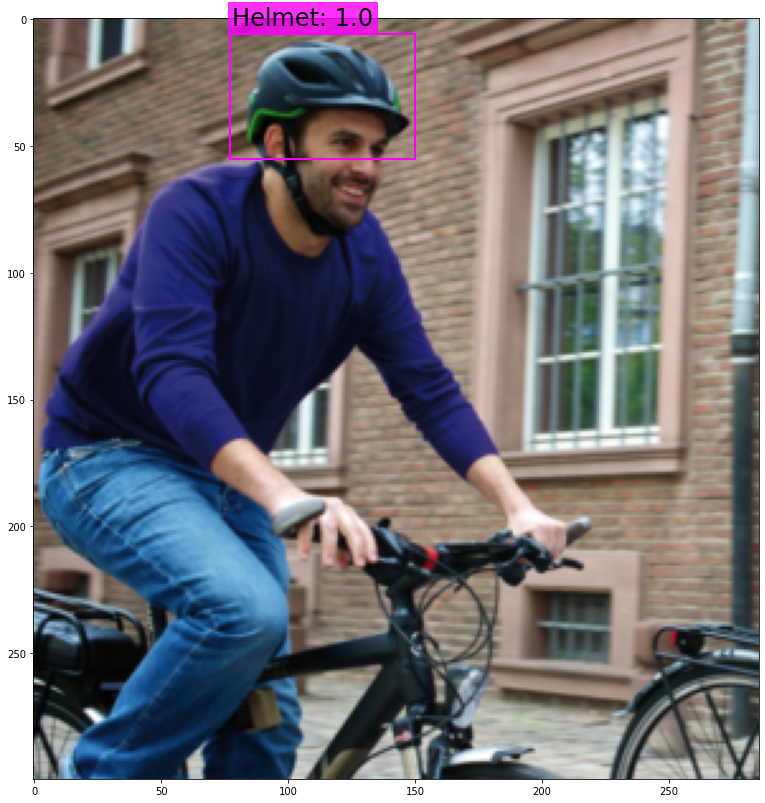

In [4]:
plt.rcParams['figure.figsize'] = [24.0, 14.0]

img = cv2.imread('./images/11.png')
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  
resized_image = cv2.resize(original_image, (m.width, m.height))

iou_thresh = 0.4
nms_thresh = 0.6
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

print_objects(boxes, class_names)
plot_boxes(original_image, boxes, class_names, plot_labels = True)